In [8]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [9]:

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (4906, 7)
Loaded Validation features dimensions: (1401, 7)
Loaded Test features dimensions: (702, 7)

Loaded Training labels dimensions: (4906, 1)
Loaded Validation labels dimensions: (1401, 1)
Loaded Test labels dimensions: (702, 1)

First few rows of loaded training features:
   Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode         id  \
0         2.0       18.75                   12         0.0  1705145.0   
1         0.0       19.77                   16         5.0  1805254.0   
2         0.0       11.76                   12         5.0  1310034.0   
3         1.0        4.25                   12        21.0  1501171.0   
4         8.0        5.76                   13        61.0  1712072.0   

   Warengruppe  KielerWoche  
0          5.0          0.0  
1          4.0          0.0  
2          4.0          0.0  
3          1.0          0.0  
4          2.0          0.0  

First few rows of loaded training labels:
   Umsatz
0  298.52
1 

In [10]:
# define neural net
model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 14 (56.00 B)

In [11]:
# compile with mean squared error
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63827.3359 - val_loss: 56035.2188
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61264.5430 - val_loss: 54584.3438
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56837.1133 - val_loss: 45521.8320
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46703.9375 - val_loss: 26940.2109
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28171.1895 - val_loss: 19461.7637
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23265.2656 - val_loss: 18363.0879
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20361.2598 - val_loss: 17800.2266
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21458.7441 - val_loss: 17428.9668
Epoch 9/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19198.8867 - val_loss: 17207.3809
Epoch 10/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19715.4824 - val_loss: 16993.0996
Epoch 11/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

In [12]:
# safe
model.save("model1.h5")

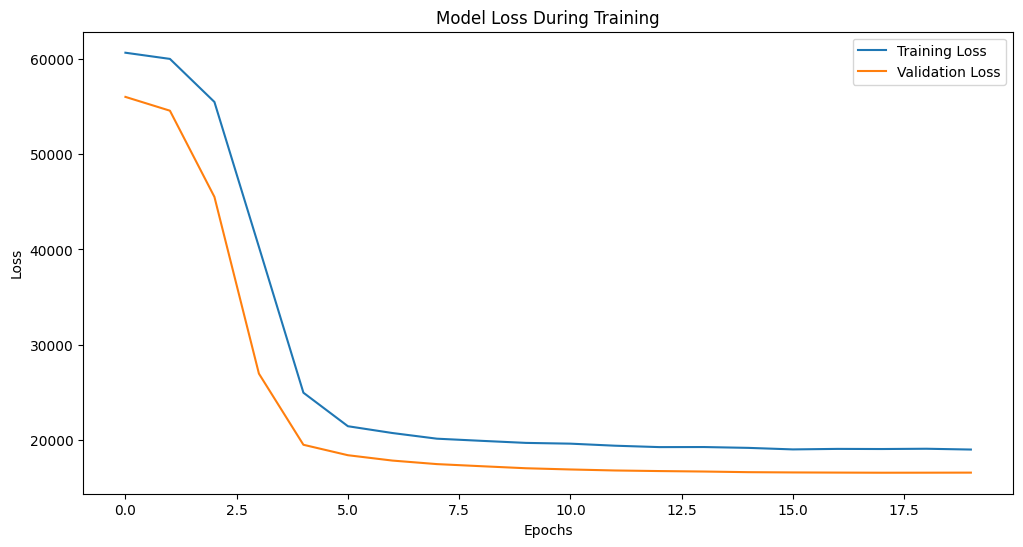

In [13]:
# Plot training history

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# make predictions

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
MAPE on the Training Data: 82.89%
MAPE on the Validation Data: 82.38%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


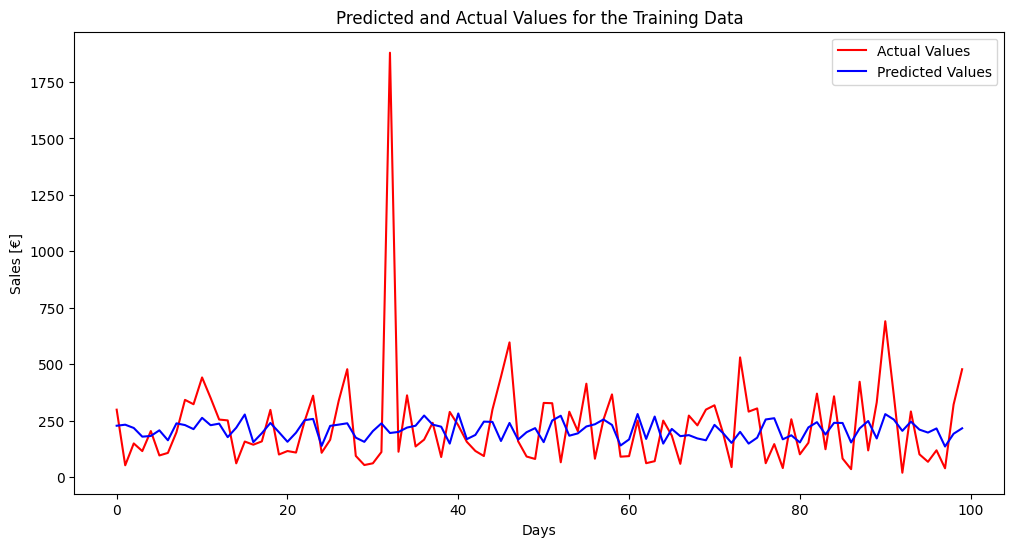

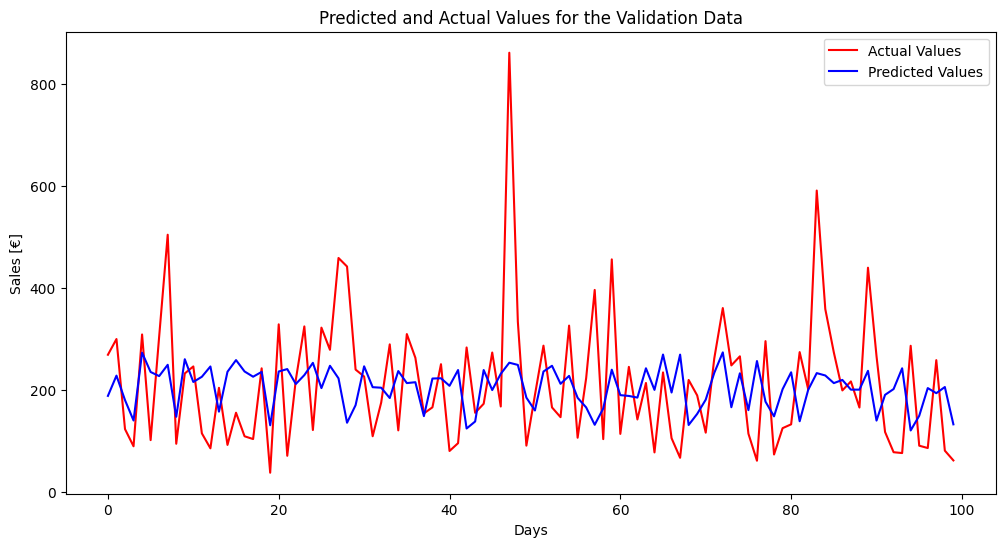

In [16]:
# plot predicted vs. actual values

def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Sales [€]')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [17]:
data_train.size

9812